<a href="https://colab.research.google.com/github/ACD-KAY/Android-StepsView/blob/master/copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Personal Google Drive

解决每次都需要授权挂载的问题

In [8]:
!pip install PyDrive2



In [9]:
from google.colab import auth
auth.authenticate_user()


In [10]:
from google.colab import drive
import os

# 挂载 Google Drive
drive.mount('/content/gdrive', force_remount=True)

# 授权步骤已经在挂载过程中自动完成，无需手动调用 GoogleAuth
print("Google Drive 已挂载！")

# 定义根目录路径
root_dir = "/content/gdrive/My Drive/"

# 列出 Google Drive 根目录中的文件
if os.path.exists(root_dir):
    print("列出根目录中的文件:")
    for file_name in os.listdir(root_dir):
        print(file_name)
else:
    print("目录不存在，请检查挂载路径。")




Mounted at /content/gdrive
Google Drive 已挂载！
列出根目录中的文件:
COMP9517_Assignment
.ipynb_checkpoints
Colab Notebooks


In [11]:
import os
import glob
import json
import pandas as pd
from pycocotools.coco import COCO
from PIL import Image
import numpy as np
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
from zipfile import ZipFile
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/MyDrive/"

Mounted at /content/gdrive


In [13]:
path = '/content/gdrive/MyDrive/' + 'COMP9517_Assignment'
os.listdir(path)

['seaturtle']

# Download data & unzip

If you have not download yet, remeber to uncomment the following cell.

In [14]:
import os

# 定义目标路径
path = "/content"  # 或者使用你需要的自定义路径

# 检查本地是否已经存在 seaturtle 文件夹
if not os.path.exists(f"{path}/seaturtle"):
    print("seaturtle 文件夹不存在，开始下载数据集...")

    # 隐藏命令行输出的设置
    # 安装 kaggle 并下载数据集
    !pip uninstall -y kaggle &> /dev/null
    !pip install kaggle &> /dev/null
    !apt-get install -q tree  # -q 表示安静模式

    # 下载海龟数据集并解压
    !kaggle datasets download wildlifedatasets/seaturtleid2022 &> /dev/null
    !unzip -q -o seaturtleid2022.zip

    # 移动数据到目标路径，并隐藏移动过程的输出
    !mkdir -p {path}/seaturtle && mv -f turtles-data/data/* {path}/seaturtle &> /dev/null

    # 删除临时文件，隐藏删除过程的输出
    !rm -rf turtles-data seaturtleid2022.zip license.txt &> /dev/null

    print("数据集已下载并解压到本地。")
else:
    print("seaturtle 文件夹已存在，跳过下载。")

# 检查移动后的文件是否在正确目录
print("确认数据是否在正确目录:")
!ls {path}/seaturtle  # 列出目标文件夹中的内容


seaturtle 文件夹不存在，开始下载数据集...
Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (73.5 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
数据集已下载并解压到本地。
确认数据是否在正确目录:
annotations.json  images  metadata.csv	metadata_splits.csv


In [15]:
dataPath = path + '/seaturtle/'
!tree -L 1 {dataPath}

/content/seaturtle/
├── annotations.json
├── images
├── metadata.csv
└── metadata_splits.csv

1 directory, 3 files


# Pre-process of dataset

In [16]:
coco = COCO(dataPath + 'annotations.json')

loading annotations into memory...
Done (t=8.89s)
creating index...
index created!


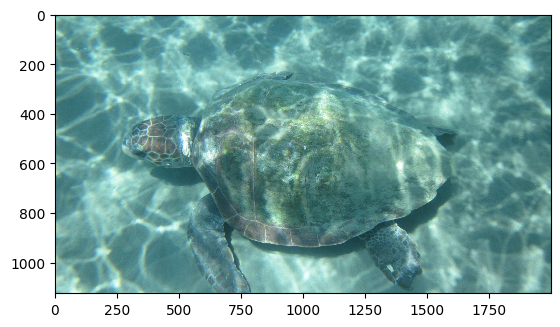

In [17]:
img_id = 15
img = coco.imgs[img_id]

image = np.array(Image.open(dataPath + img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()

In [18]:
# Let's overlay annotations
# plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)

In [19]:
for i in anns:
  print(i)

{'id': 72, 'image_id': 15, 'category_id': 3, 'segmentation': {'counts': [312982, 45, 1076, 51, 1072, 54, 1069, 55, 1068, 57, 1066, 59, 1063, 62, 1060, 64, 1058, 67, 1055, 70, 1053, 71, 1051, 74, 1050, 75, 1047, 78, 1045, 79, 1042, 83, 1038, 87, 1036, 88, 1035, 89, 1034, 91, 1032, 92, 1032, 92, 1031, 94, 1028, 96, 1025, 99, 1021, 104, 1019, 106, 1017, 108, 1015, 110, 1013, 111, 1012, 113, 1010, 114, 1008, 116, 1007, 118, 1005, 119, 1004, 120, 1003, 121, 1003, 122, 1001, 123, 1000, 124, 999, 125, 997, 128, 995, 129, 994, 131, 993, 131, 992, 133, 991, 134, 989, 135, 988, 137, 986, 139, 984, 140, 983, 141, 982, 143, 981, 143, 980, 144, 980, 144, 980, 144, 980, 144, 980, 144, 980, 144, 980, 145, 979, 145, 978, 146, 977, 148, 975, 149, 974, 151, 972, 153, 970, 155, 968, 157, 967, 157, 967, 157, 967, 158, 966, 158, 966, 158, 965, 159, 965, 159, 965, 159, 965, 159, 965, 160, 963, 161, 963, 161, 962, 162, 960, 164, 959, 165, 958, 166, 958, 166, 957, 167, 957, 168, 956, 168, 956, 169, 955, 170, 

显示标注

In [20]:
# 获取所有类别信息
categories = coco.loadCats(coco.getCatIds())

# 打印类别信息
for category in categories:
    print(f"Category ID: {category['id']}, Name: {category['name']}")


Category ID: 1, Name: turtle
Category ID: 2, Name: flipper
Category ID: 3, Name: head


In [23]:
len(anns)

6

In [ ]:
# coco.showAnns(anns)

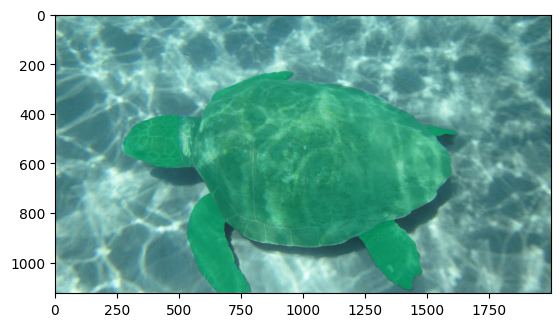

In [21]:
plt.imshow(image)
coco.showAnns(anns)

方框标记

Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format
Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format
Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format
Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format
Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format
Skipping invalid segmentation with length 6 or non-list format
Skipping invalid segmentation with length 4 or non-list format


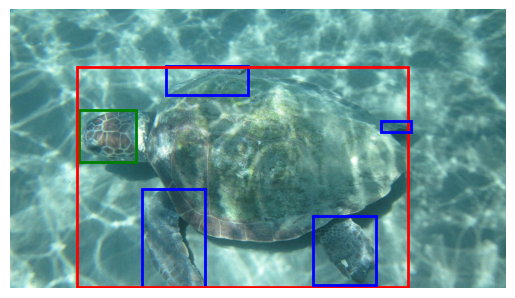

Segmentation data: size


In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 显示图像
plt.imshow(image)
plt.axis('off')

def get_color_by_category(category_id):
    # 例如，定义类别和对应颜色的映射
    category_colors = {
        1: 'red',      # 类别 1 颜色
        2: 'blue',     # 类别 2 颜色
        3: 'green',    # 类别 3 颜色
        # 根据类别添加更多颜色映射
    }

    # 返回指定类别的颜色
    return category_colors.get(category_id, 'black')  # 如果找不到类别，返回默认颜色


# 自定义显示标注的颜色
for ann in anns:
    color = get_color_by_category(ann['category_id'])  # 根据类别 ID 获取颜色

    if 'segmentation' in ann:
        # segmentation 可以是多边形格式，也可以是 RLE 格式
        for seg in ann['segmentation']:
            if isinstance(seg, list) and len(seg) % 2 == 0:  # 确保是多边形格式并且长度为偶数
                try:
                    # 进行 reshape 操作
                    poly = np.array(seg).reshape((len(seg) // 2, 2))  # 将一维数组转为二维，每行为 (x, y)
                    polygon = patches.Polygon(poly, fill=True, edgecolor=color, facecolor=color, alpha=0.5)
                    plt.gca().add_patch(polygon)
                except ValueError as e:
                    print(f"Error reshaping segmentation: {seg}, error: {e}")
            else:
                print(f"Skipping invalid segmentation with length {len(seg)} or non-list format")

    if 'bbox' in ann:
        # 绘制边界框
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor=color, facecolor='none')
        plt.gca().add_patch(rect)

# 显示最终结果
plt.show()
print(f"Segmentation data: {seg}")


颜色标记 方法1 根据label映射

loading annotations into memory...
Done (t=7.28s)
creating index...
index created!


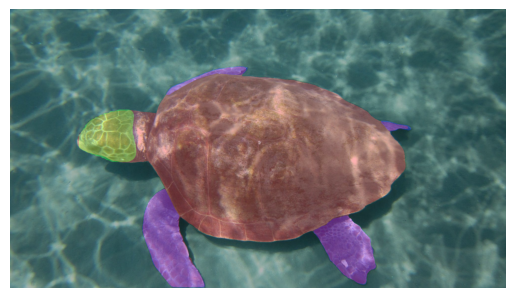

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
from PIL import Image

# 加载 COCO 数据集
coco = COCO(dataPath + 'annotations.json')

# 获取图片
img_id = 15  # 假设选择 ID 为15的图片
img = coco.imgs[img_id]
image = np.array(Image.open(dataPath + img['file_name']))

# 获取图片的所有标注
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)

# 定义颜色映射，根据类别给头、四肢、身体不同的颜色
colors = {
    "body": [1, 0, 0],    # 身体用红色表示 (R, G, B)
    "limbs": [0, 0, 1],    # 四肢用蓝色表示
    "head": [0, 1, 0]    # 头用绿色表示
}

# 根据类别 ID 分配颜色
def get_color_by_category(category_id):
    # 假设 category_id 对应：1 - 身体, 2 - 四肢, 3 - 头
    if category_id == 1:
        return colors["body"]
    elif category_id == 2:
        return colors["limbs"]
    elif category_id == 3:
        return colors["head"]
    else:
        return [1, 1, 0]  # 其他类别用黄色表示

# 创建一个与原图像相同尺寸的 "mask" 层，用于覆盖不同部位
mask = np.zeros_like(image, dtype=np.float32)

# 自定义显示标注的颜色并在图像上进行填充
for ann in anns:
    color = get_color_by_category(ann['category_id'])  # 根据类别 ID 获取颜色

    if 'segmentation' in ann:
        if isinstance(ann['segmentation'], dict) and 'counts' in ann['segmentation']:  # RLE 格式
            rle = ann['segmentation']

            # 使用 frPyObjects 将 RLE 转换为标准 RLE 格式
            if isinstance(rle['counts'], list):
                rle = maskUtils.frPyObjects(rle, image.shape[0], image.shape[1])

            # 解码 RLE 为二进制掩码
            binary_mask = maskUtils.decode(rle)

            # 遍历掩码中的每个像素，并在对应的位置填充颜色
            for i in range(3):  # 对 R, G, B 通道分别进行填充
                mask[:, :, i] += binary_mask * color[i]

# 将 mask 层覆盖在原始图像上
blended_image = 0.7 * image / 255 + 0.3 * mask  # 调整透明度，使得原图和涂色图层混合
blended_image = np.clip(blended_image, 0, 1)  # 限制值在0到1之间

# 显示最终的图像
plt.imshow(blended_image)
plt.axis('off')
plt.show()


颜色标记 方法2 调用库

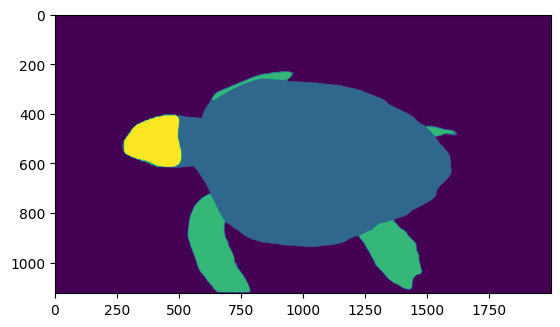

In [29]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

另一个例子

In [30]:
image_id = 66
img = coco.imgs[image_id]
img

{'id': 66,
 'width': 2000,
 'height': 1500,
 'file_name': 'images/t004/ESNBlsdTpx.JPG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'timestamp': '2011:07:29 11:36:25',
 'identity': 't004'}

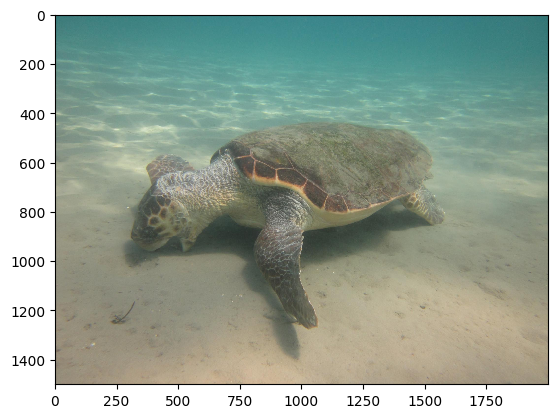

In [31]:
# Let's display the image
image = np.array(Image.open(dataPath + img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()

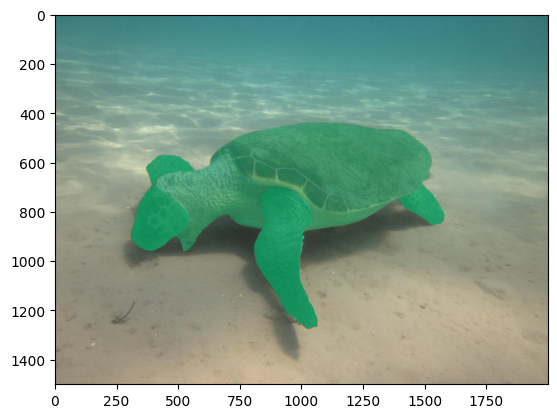

In [32]:
# Let's overlay annotations
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

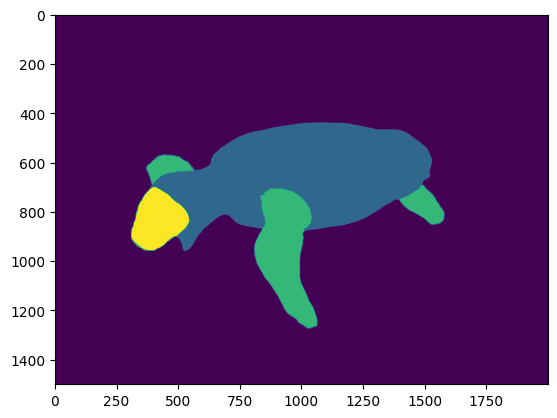

In [33]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.imshow(mask)

准确率计算方法示范

loading annotations into memory...
Done (t=12.72s)
creating index...
index created!


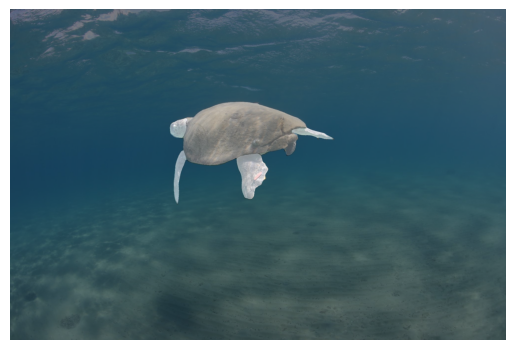

Accuracy (IoU): 1.0000


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

# 加载COCO数据集注释文件
coco = COCO('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/annotations.json')

# 获取所有图片ID
img_ids = coco.getImgIds()

# 选择其中一个图片的ID，比如选择第一个图片
image_id = img_ids[0]

# 加载图片
img = coco.loadImgs(image_id)[0]
image = plt.imread('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/' + img['file_name'])  # 替换为图片的实际路径

# 显示图片
plt.imshow(image)
plt.axis('off')

# 获取类别ID和注释ID
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)

# 初始化掩码
mask = np.zeros((img['height'], img['width']))

# 叠加所有对象的掩码
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

# 显示叠加后的掩码
plt.imshow(mask, alpha=0.5, cmap='gray')
plt.axis('off')
plt.show()

# 计算准确率的函数
def compute_accuracy(predicted_mask, ground_truth_mask):
    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou

# 假设 'predicted_mask' 是模型的预测掩码
# 'ground_truth_mask' 是 COCO 数据集提供的真实掩码
predicted_mask = mask # 替换为实际的模型输出掩码
ground_truth_mask = mask # 替换为真实的标注掩码

# 计算准确率（IoU）
accuracy = compute_accuracy(predicted_mask, ground_truth_mask)
print(f"Accuracy (IoU): {accuracy:.4f}")


1. 必要库安装

根据个人实际情况安装，需要torch和torchvision版本同步





In [ ]:
pip install torch==2.4.1 torchvision --upgrade


  Using cached torchvision-0.20.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.1 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.

2. 真实掩码

loading annotations into memory...
Done (t=9.62s)
creating index...
index created!


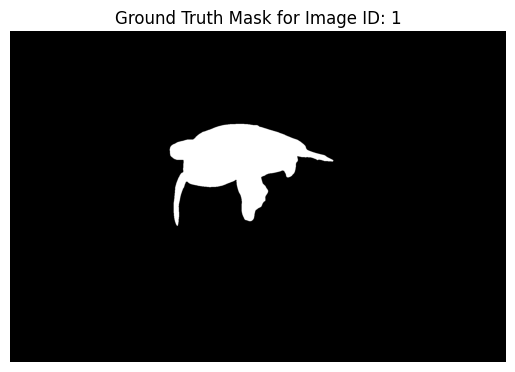

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO

# 加载COCO数据集注释文件
coco = COCO('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/annotations.json')

# 获取所有图片ID
img_ids = coco.getImgIds()

# 选择某张图片
image_id = img_ids[0]

# 加载图片信息
img = coco.loadImgs(image_id)[0]

# 获取该图片的注释ID（anns_ids 是该图片中所有对象的注释 ID）
anns_ids = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(anns_ids)

# 初始化掩码，与图片大小相同
ground_truth_mask = np.zeros((img['height'], img['width']))

# 叠加所有对象的真实掩码
for ann in anns:
    object_mask = coco.annToMask(ann)
    ground_truth_mask += object_mask

# 将掩码值限制在 0 和 1 之间，防止叠加时某个像素值大于 1
ground_truth_mask = np.clip(ground_truth_mask, 0, 1)

# 显示真实掩码
plt.imshow(ground_truth_mask, cmap='gray')
plt.title(f"Ground Truth Mask for Image ID: {image_id}")
plt.axis('off')
plt.show()


3.预测的掩码：

说明：运行该代码需要大量时间，暂时先注释掉

In [ ]:
# import torch
# import torchvision
# import torchvision.transforms as T
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np
# from pycocotools.coco import COCO
# import random

# # 加载COCO数据集注释文件
# coco = COCO('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/annotations.json')

# # 获取所有图片ID
# img_ids = coco.getImgIds()

# # 设置随机种子以保证划分结果可复现
# random.seed(42)

# # 随机打乱图片ID
# random.shuffle(img_ids)

# # 按照70%训练，10%验证，20%测试的比例划分数据集
# train_ratio = 0.7
# val_ratio = 0.1
# test_ratio = 0.2

# train_size = int(len(img_ids) * train_ratio)
# val_size = int(len(img_ids) * val_ratio)

# train_img_ids = img_ids[:train_size]
# val_img_ids = img_ids[train_size:train_size + val_size]
# test_img_ids = img_ids[train_size + val_size:]

# print(f"训练集大小: {len(train_img_ids)}")
# print(f"验证集大小: {len(val_img_ids)}")
# print(f"测试集大小: {len(test_img_ids)}")

# # 使用 torchvision.models.detection 加载预训练的Mask R-CNN模型
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
# model.eval()  # 设置为评估模式

# # 数据预处理
# transform = T.Compose([
#     T.ToTensor()  # 将图像转换为张量
# ])

# # 生成测试集的预测掩码
# for image_id in test_img_ids:
#     # 加载图片信息
#     img = coco.loadImgs(image_id)[0]
#     image = Image.open('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/' + img['file_name'])  # 加载实际图片

#     # 对图像进行预处理
#     image_tensor = transform(image).unsqueeze(0)  # 添加批次维度

#     # 模型推理
#     with torch.no_grad():
#         predictions = model(image_tensor)

#     # 获取预测的掩码 (Mask R-CNN 的输出结果)
#     if len(predictions[0]['masks']) > 0:
#         predicted_masks = predictions[0]['masks'].cpu().numpy()  # 将预测结果转为numpy数组

#         # 对每个预测的对象掩码进行处理
#         for i, mask in enumerate(predicted_masks):
#             # 将预测掩码处理为二值掩码 (0 或 1)
#             binary_mask = (mask[0] > 0.5).astype(np.uint8)  # 假设概率大于0.5为前景

#             # 显示预测掩码
#             plt.imshow(binary_mask, cmap='gray')
#             plt.title(f"Image ID: {image_id}, Object {i+1}")
#             plt.axis('off')
#             plt.show() //显示预测的掩码
#     else:
#         print(f"No masks detected for Image ID: {image_id}")


4.通过真实掩码和预测掩码计算IOU（图像分割的准确率）

IOU解释

IoU（Intersection over Union），即交并比，是评估图像分割模型性能的一种常见指标。它用于衡量模型预测的分割区域与真实的分割区域之间的重叠程度。IoU 值越高，表示模型的分割结果越接近真实情况。

4.1.计算每个部位的平均IOU

说明：若无GPU运行该代码需要5h，需谨慎运行。

In [ ]:
import torch
import torchvision
from PIL import Image
import numpy as np
from pycocotools.coco import COCO
import random
import torchvision.transforms as T
import concurrent.futures
from tqdm import tqdm  # 导入进度条库

# 加载COCO数据集注释文件
coco = COCO('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/annotations.json')

# 获取所有图片ID
img_ids = coco.getImgIds()

# 设置随机种子以保证划分结果可复现
random.seed(42)

# 随机打乱图片ID
random.shuffle(img_ids)

# 按照70%训练，10%验证，20%测试的比例划分数据集
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

train_size = int(len(img_ids) * train_ratio)
val_size = int(len(img_ids) * val_ratio)

train_img_ids = img_ids[:train_size]
val_img_ids = img_ids[train_size:train_size + val_size]
test_img_ids = img_ids[train_size + val_size:]

print(f"训练集大小: {len(train_img_ids)}")
print(f"验证集大小: {len(val_img_ids)}")
print(f"测试集大小: {len(test_img_ids)}")

# 使用预训练的Mask R-CNN模型
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # 设置为评估模式

# 数据预处理
transform = T.Compose([
    T.ToTensor()  # 将图像转换为张量
])

# 定义计算IoU的函数
def compute_iou(predicted_mask, ground_truth_mask):
    predicted_mask = (predicted_mask > 0).astype(np.uint8)
    ground_truth_mask = (ground_truth_mask > 0).astype(np.uint8)

    intersection = np.logical_and(predicted_mask, ground_truth_mask)  # 交集
    union = np.logical_or(predicted_mask, ground_truth_mask)          # 并集

    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou

# 定义类别ID (Category ID: 1 => turtle, 2 => flippers, 3 => head)
part_ids = {'head': 3, 'flippers': 2, 'turtle': 1}

# 定义阈值：打印 IoU 大于阈值的记录
iou_threshold = 0.5

# 初始化存储IoU的字典
iou_scores = {'head': [], 'flippers': [], 'turtle': []}

# 定义一个函数，用于处理每张图片的IoU计算
def process_image(image_id):
    # 加载图片信息
    img = coco.loadImgs(image_id)[0]
    image = Image.open('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/' + img['file_name'])

    # 将图像转换为张量
    image_tensor = transform(image).unsqueeze(0)

    # 模型推理
    with torch.no_grad():
        prediction = model(image_tensor)[0]

    # 初始化一个字典来存储每个部位的IoU
    image_iou_scores = {'head': 0, 'flippers': 0, 'turtle': 0}

    # 遍历每个部位
    for part_name, part_id in part_ids.items():
        # 获取该部分的真实掩码
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=[part_id])
        anns = coco.loadAnns(anns_ids)
        ground_truth_mask = np.zeros((img['height'], img['width']))
        for ann in anns:
            ground_truth_mask += coco.annToMask(ann)
        ground_truth_mask = np.clip(ground_truth_mask, 0, 1)  # 确保掩码是二值的

        # 获取该部分的预测掩码
        predicted_mask = None
        if len(prediction['masks']) > 0:
            predicted_masks = prediction['masks'].cpu().numpy()
            predicted_labels = prediction['labels'].cpu().numpy()

            # 过滤出对应类别的预测掩码
            for i, label in enumerate(predicted_labels):
                if label == part_id:
                    predicted_mask = predicted_masks[i][0]  # 取第一个通道
                    break

        # 计算IoU
        if predicted_mask is not None:
            iou = compute_iou(predicted_mask, ground_truth_mask)
            image_iou_scores[part_name] = iou

            # 打印 IoU 大于阈值的记录
            if iou > iou_threshold:
                print(f"Image ID: {image_id}, {part_name} IoU: {iou:.4f}")

    return image_iou_scores

# 使用进度条和多线程并行处理每张图片的IoU计算
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_image, test_img_ids), total=len(test_img_ids), desc="Processing images"))

# 整理并计算每个类别的mIoU
for part_name in part_ids:
    iou_scores[part_name] = [result[part_name] for result in results]
    mIoU = np.mean(iou_scores[part_name])  # 计算每个部位的平均IoU
    print(f"{part_name} mIoU: {mIoU:.4f}")

    # 删除记录，释放内存
    del iou_scores[part_name]


loading annotations into memory...
Done (t=12.09s)
creating index...
index created!
训练集大小: 6110
验证集大小: 872
测试集大小: 1747


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Processing images:   0%|          | 0/1747 [00:00<?, ?it/s]

Image ID: 7357, turtle IoU: 0.5513


Processing images:   1%|          | 10/1747 [02:19<4:33:58,  9.46s/it]

Image ID: 7357, turtle IoU: 0.5513


Processing images:   1%|          | 13/1747 [03:38<9:59:47, 20.75s/it]

Image ID: 6261, turtle IoU: 0.5545


Processing images:   1%|          | 14/1747 [03:42<8:08:42, 16.92s/it]

Image ID: 2470, turtle IoU: 0.5887


Processing images:   1%|▏         | 24/1747 [04:56<3:04:31,  6.43s/it]

Image ID: 7972, turtle IoU: 0.5610


Processing images:   1%|▏         | 25/1747 [06:01<8:34:19, 17.92s/it]

Image ID: 2527, turtle IoU: 0.5538
Image ID: 5466, turtle IoU: 0.5334


Processing images:   2%|▏         | 29/1747 [06:12<3:57:57,  8.31s/it]

Image ID: 4859, turtle IoU: 0.6247


Processing images:   2%|▏         | 35/1747 [07:17<4:10:53,  8.79s/it]

Image ID: 7651, turtle IoU: 0.5368


Processing images:   3%|▎         | 45/1747 [09:24<5:35:04, 11.81s/it]

Image ID: 3474, turtle IoU: 0.5227


Processing images:   3%|▎         | 51/1747 [10:29<5:31:28, 11.73s/it]

Image ID: 408, turtle IoU: 0.5609


Processing images:   3%|▎         | 56/1747 [11:29<6:42:27, 14.28s/it]

Image ID: 431, turtle IoU: 0.5206


Processing images:   4%|▍         | 70/1747 [14:00<4:59:52, 10.73s/it]

Image ID: 1763, turtle IoU: 0.5638


Processing images:   4%|▍         | 74/1747 [14:51<5:30:32, 11.85s/it]

Image ID: 252, turtle IoU: 0.6413


Processing images:   6%|▌         | 98/1747 [19:10<4:43:16, 10.31s/it]

Image ID: 216, turtle IoU: 0.6583


Processing images:   6%|▌         | 105/1747 [20:37<5:43:12, 12.54s/it]

Image ID: 6287, turtle IoU: 0.5881


Processing images:   7%|▋         | 115/1747 [22:32<6:07:05, 13.50s/it]

Image ID: 3012, turtle IoU: 0.8061


Processing images:   8%|▊         | 140/1747 [27:07<5:29:37, 12.31s/it]

Image ID: 7633, turtle IoU: 0.5237


Processing images:   9%|▉         | 161/1747 [31:00<5:27:55, 12.41s/it]

Image ID: 3886, turtle IoU: 0.5917


Processing images:   9%|▉         | 163/1747 [31:17<4:53:53, 11.13s/it]

Image ID: 1251, turtle IoU: 0.5263


Processing images:  10%|▉         | 170/1747 [32:46<6:32:31, 14.93s/it]

Image ID: 779, turtle IoU: 0.5004


Processing images:  11%|█▏        | 198/1747 [37:46<4:27:35, 10.37s/it]

Image ID: 4347, turtle IoU: 0.5843


Processing images:  12%|█▏        | 203/1747 [38:48<4:39:46, 10.87s/it]

Image ID: 4493, turtle IoU: 0.5837


Processing images:  12%|█▏        | 212/1747 [40:31<5:29:52, 12.89s/it]

Image ID: 2639, turtle IoU: 0.5115


Processing images:  13%|█▎        | 225/1747 [42:41<4:25:25, 10.46s/it]

Image ID: 256, turtle IoU: 0.5507


Processing images:  13%|█▎        | 232/1747 [44:14<5:24:20, 12.85s/it]

Image ID: 356, turtle IoU: 0.5116


Processing images:  14%|█▎        | 240/1747 [45:37<4:09:13,  9.92s/it]

Image ID: 4864, turtle IoU: 0.5443


Processing images:  15%|█▌        | 263/1747 [50:07<6:06:46, 14.83s/it]

Image ID: 122, turtle IoU: 0.5451


Processing images:  16%|█▌        | 272/1747 [51:28<3:34:18,  8.72s/it]

Image ID: 7327, turtle IoU: 0.5675


Processing images:  16%|█▌        | 276/1747 [52:25<5:26:11, 13.30s/it]

Image ID: 2272, turtle IoU: 0.5129


Processing images:  16%|█▌        | 278/1747 [52:33<3:26:19,  8.43s/it]

Image ID: 4883, turtle IoU: 0.5420


Processing images:  16%|█▌        | 283/1747 [53:45<5:41:41, 14.00s/it]

Image ID: 1909, turtle IoU: 0.5695


Processing images:  16%|█▋        | 286/1747 [54:09<4:17:58, 10.59s/it]

Image ID: 1770, turtle IoU: 0.5207


Processing images:  16%|█▋        | 287/1747 [54:33<5:38:31, 13.91s/it]

Image ID: 8688, turtle IoU: 0.5649


Processing images:  17%|█▋        | 304/1747 [57:20<3:03:50,  7.64s/it]

Image ID: 5257, turtle IoU: 0.6254


Processing images:  18%|█▊        | 320/1747 [1:00:30<4:09:40, 10.50s/it]

Image ID: 8438, turtle IoU: 0.6118


Processing images:  19%|█▊        | 326/1747 [1:01:36<4:08:56, 10.51s/it]

Image ID: 3633, turtle IoU: 0.5378


Processing images:  19%|█▊        | 327/1747 [1:01:45<3:55:56,  9.97s/it]

Image ID: 1780, turtle IoU: 0.5145


Processing images:  19%|█▉        | 337/1747 [1:03:36<4:03:19, 10.35s/it]

Image ID: 5366, turtle IoU: 0.5165


Processing images:  20%|██        | 351/1747 [1:06:12<3:45:47,  9.70s/it]

Image ID: 3184, turtle IoU: 0.5208


Processing images:  20%|██        | 354/1747 [1:06:51<4:31:05, 11.68s/it]

Image ID: 7269, turtle IoU: 0.5061


Processing images:  20%|██        | 355/1747 [1:07:04<4:37:40, 11.97s/it]

Image ID: 7568, turtle IoU: 0.5451


Processing images:  21%|██        | 366/1747 [1:09:05<5:47:15, 15.09s/it]

Image ID: 2476, turtle IoU: 0.5438


Processing images:  22%|██▏       | 378/1747 [1:11:22<5:53:17, 15.48s/it]

Image ID: 5076, turtle IoU: 0.5252


Processing images:  22%|██▏       | 387/1747 [1:12:48<3:58:53, 10.54s/it]

Image ID: 3122, turtle IoU: 0.5447


Processing images:  23%|██▎       | 402/1747 [1:15:55<6:16:38, 16.80s/it]

Image ID: 2997, turtle IoU: 0.6227


Processing images:  26%|██▌       | 456/1747 [1:25:44<5:54:42, 16.48s/it]

Image ID: 5147, turtle IoU: 0.5327


Processing images:  26%|██▋       | 461/1747 [1:26:16<2:41:21,  7.53s/it]

Image ID: 6288, turtle IoU: 0.5503


Processing images:  27%|██▋       | 476/1747 [1:29:15<3:32:05, 10.01s/it]

Image ID: 2345, turtle IoU: 0.5850


Processing images:  27%|██▋       | 478/1747 [1:29:29<3:02:09,  8.61s/it]

Image ID: 7407, turtle IoU: 0.5991


Processing images:  28%|██▊       | 487/1747 [1:31:27<4:57:08, 14.15s/it]

Image ID: 5619, turtle IoU: 0.6376


Processing images:  28%|██▊       | 496/1747 [1:32:40<2:28:35,  7.13s/it]

Image ID: 2419, turtle IoU: 0.5799


Processing images:  29%|██▉       | 515/1747 [1:36:16<3:10:08,  9.26s/it]

Image ID: 5235, turtle IoU: 0.6143


Processing images:  30%|███       | 525/1747 [1:38:10<2:39:06,  7.81s/it]

Image ID: 7383, turtle IoU: 0.5339


Processing images:  30%|███       | 527/1747 [1:38:41<3:48:14, 11.22s/it]

Image ID: 6592, turtle IoU: 0.5946


Processing images:  31%|███       | 543/1747 [1:41:31<2:46:52,  8.32s/it]

Image ID: 5077, turtle IoU: 0.5547


Processing images:  31%|███▏      | 546/1747 [1:42:31<4:59:29, 14.96s/it]

Image ID: 4993, turtle IoU: 0.5723


Processing images:  32%|███▏      | 555/1747 [1:43:45<2:23:10,  7.21s/it]

Image ID: 8472, turtle IoU: 0.5426


Processing images:  32%|███▏      | 563/1747 [1:45:23<4:27:43, 13.57s/it]

Image ID: 8135, turtle IoU: 0.6317


Processing images:  33%|███▎      | 568/1747 [1:45:59<2:19:59,  7.12s/it]

Image ID: 2454, turtle IoU: 0.5074


Processing images:  33%|███▎      | 570/1747 [1:46:55<5:24:18, 16.53s/it]

Image ID: 7985, turtle IoU: 0.5058


Processing images:  35%|███▍      | 610/1747 [1:54:01<2:35:49,  8.22s/it]

Image ID: 2774, turtle IoU: 0.7733


Processing images:  36%|███▌      | 625/1747 [1:56:54<3:17:50, 10.58s/it]

Image ID: 817, turtle IoU: 0.6377


Processing images:  36%|███▌      | 626/1747 [1:57:04<3:15:45, 10.48s/it]

Image ID: 3607, turtle IoU: 0.5288


Processing images:  36%|███▋      | 634/1747 [1:58:28<2:42:01,  8.73s/it]

Image ID: 7966, turtle IoU: 0.7149


Processing images:  37%|███▋      | 640/1747 [1:59:35<2:50:02,  9.22s/it]

Image ID: 6492, turtle IoU: 0.5864


Processing images:  37%|███▋      | 641/1747 [1:59:57<3:58:18, 12.93s/it]

Image ID: 5437, turtle IoU: 0.6001


Processing images:  37%|███▋      | 648/1747 [2:01:08<3:27:55, 11.35s/it]

Image ID: 6101, turtle IoU: 0.5383


Processing images:  37%|███▋      | 649/1747 [2:01:23<3:48:43, 12.50s/it]

Image ID: 2607, turtle IoU: 0.5191


Processing images:  38%|███▊      | 657/1747 [2:02:37<2:41:33,  8.89s/it]

Image ID: 1957, turtle IoU: 0.5435


Processing images:  38%|███▊      | 660/1747 [2:03:23<3:34:23, 11.83s/it]

Image ID: 7642, turtle IoU: 0.5029


Processing images:  39%|███▉      | 677/1747 [2:06:17<2:28:08,  8.31s/it]

Image ID: 4751, turtle IoU: 0.5069


Processing images:  39%|███▉      | 679/1747 [2:06:50<3:30:19, 11.82s/it]

Image ID: 6861, turtle IoU: 0.6069


Processing images:  39%|███▉      | 682/1747 [2:07:18<2:58:17, 10.04s/it]

Image ID: 2318, turtle IoU: 0.5306


Processing images:  42%|████▏     | 729/1747 [2:15:53<2:09:44,  7.65s/it]

Image ID: 764, turtle IoU: 0.5746


Processing images:  44%|████▍     | 769/1747 [2:23:19<2:50:00, 10.43s/it]

Image ID: 8603, turtle IoU: 0.5066


Processing images:  45%|████▍     | 779/1747 [2:25:15<3:26:18, 12.79s/it]

Image ID: 722, turtle IoU: 0.5414


Processing images:  45%|████▍     | 782/1747 [2:25:39<2:28:23,  9.23s/it]

Image ID: 8727, turtle IoU: 0.5757


Processing images:  45%|████▌     | 789/1747 [2:26:53<2:18:35,  8.68s/it]

Image ID: 4059, turtle IoU: 0.5023


Processing images:  45%|████▌     | 791/1747 [2:27:26<3:07:03, 11.74s/it]

Image ID: 3373, turtle IoU: 0.7359


Processing images:  45%|████▌     | 793/1747 [2:27:46<2:56:06, 11.08s/it]

Image ID: 1318, turtle IoU: 0.6074


Processing images:  46%|████▌     | 795/1747 [2:27:57<2:08:56,  8.13s/it]

Image ID: 857, turtle IoU: 0.6448


Processing images:  46%|████▌     | 800/1747 [2:29:02<2:43:09, 10.34s/it]

Image ID: 2851, turtle IoU: 0.5291


Processing images:  46%|████▌     | 805/1747 [2:30:13<3:31:02, 13.44s/it]

Image ID: 5201, turtle IoU: 0.5041


Processing images:  47%|████▋     | 813/1747 [2:31:26<2:12:13,  8.49s/it]

Image ID: 4252, turtle IoU: 0.5415


Processing images:  48%|████▊     | 837/1747 [2:35:57<2:43:46, 10.80s/it]

Image ID: 6018, turtle IoU: 0.5473


Processing images:  48%|████▊     | 843/1747 [2:37:04<2:39:27, 10.58s/it]

Image ID: 3587, turtle IoU: 0.5358


Processing images:  49%|████▉     | 856/1747 [2:39:34<3:03:47, 12.38s/it]

Image ID: 2365, turtle IoU: 0.5187


Processing images:  49%|████▉     | 859/1747 [2:40:20<4:07:40, 16.73s/it]

Image ID: 6753, turtle IoU: 0.5479


Processing images:  50%|████▉     | 869/1747 [2:41:58<2:40:55, 11.00s/it]

Image ID: 2177, turtle IoU: 0.5109


Processing images:  50%|████▉     | 870/1747 [2:41:58<1:56:45,  7.99s/it]

Image ID: 7442, turtle IoU: 0.5031


Processing images:  51%|█████     | 893/1747 [2:46:33<3:32:21, 14.92s/it]

Image ID: 2317, turtle IoU: 0.5224


Processing images:  51%|█████▏    | 898/1747 [2:47:08<1:52:17,  7.94s/it]

Image ID: 2386, turtle IoU: 0.6754


Processing images:  52%|█████▏    | 907/1747 [2:49:00<2:57:22, 12.67s/it]

Image ID: 4522, turtle IoU: 0.5235


Processing images:  52%|█████▏    | 911/1747 [2:49:42<2:39:06, 11.42s/it]

Image ID: 666, turtle IoU: 0.6350


Processing images:  52%|█████▏    | 914/1747 [2:50:20<2:38:48, 11.44s/it]

Image ID: 1729, turtle IoU: 0.6070


Processing images:  54%|█████▎    | 937/1747 [2:54:40<2:54:39, 12.94s/it]

Image ID: 1849, turtle IoU: 0.5034


Processing images:  54%|█████▍    | 941/1747 [2:55:15<2:31:09, 11.25s/it]

Image ID: 4967, turtle IoU: 0.5155


Processing images:  54%|█████▍    | 943/1747 [2:55:44<2:48:41, 12.59s/it]

Image ID: 6263, turtle IoU: 0.5044


Processing images:  54%|█████▍    | 949/1747 [2:56:57<3:04:33, 13.88s/it]

Image ID: 7776, turtle IoU: 0.5833


Processing images:  55%|█████▍    | 959/1747 [2:58:35<2:26:52, 11.18s/it]

Image ID: 4029, turtle IoU: 0.5761


Processing images:  56%|█████▌    | 971/1747 [3:00:54<2:43:26, 12.64s/it]

Image ID: 2792, turtle IoU: 0.5234


Processing images:  56%|█████▌    | 975/1747 [3:01:41<2:47:44, 13.04s/it]

Image ID: 2330, turtle IoU: 0.5338


Processing images:  56%|█████▋    | 984/1747 [3:03:25<2:36:31, 12.31s/it]

Image ID: 8188, turtle IoU: 0.6820


Processing images:  56%|█████▋    | 987/1747 [3:03:58<2:31:05, 11.93s/it]

Image ID: 2394, turtle IoU: 0.6351


Processing images:  57%|█████▋    | 988/1747 [3:04:03<2:04:27,  9.84s/it]

Image ID: 8429, turtle IoU: 0.5698


Processing images:  57%|█████▋    | 996/1747 [3:05:30<2:15:26, 10.82s/it]

Image ID: 2477, turtle IoU: 0.5467


Processing images:  57%|█████▋    | 1004/1747 [3:07:03<2:51:00, 13.81s/it]

Image ID: 2319, turtle IoU: 0.5618


Processing images:  58%|█████▊    | 1011/1747 [3:08:23<2:30:39, 12.28s/it]

Image ID: 3967, turtle IoU: 0.5813


Processing images:  58%|█████▊    | 1021/1747 [3:09:57<1:37:13,  8.03s/it]

Image ID: 980, turtle IoU: 0.5518


Processing images:  60%|█████▉    | 1048/1747 [3:15:07<1:50:56,  9.52s/it]

Image ID: 1816, turtle IoU: 0.5024


Processing images:  62%|██████▏   | 1078/1747 [3:20:46<2:19:22, 12.50s/it]

Image ID: 2789, turtle IoU: 0.6198


Processing images:  62%|██████▏   | 1080/1747 [3:20:48<1:21:56,  7.37s/it]

Image ID: 6536, turtle IoU: 0.6429


Processing images:  62%|██████▏   | 1082/1747 [3:21:19<2:00:40, 10.89s/it]

Image ID: 1738, turtle IoU: 0.5193


Processing images:  62%|██████▏   | 1090/1747 [3:23:02<2:25:09, 13.26s/it]

Image ID: 3105, turtle IoU: 0.6017


Processing images:  63%|██████▎   | 1102/1747 [3:25:17<2:27:54, 13.76s/it]

Image ID: 6806, turtle IoU: 0.5714


Processing images:  63%|██████▎   | 1105/1747 [3:25:31<1:29:21,  8.35s/it]

Image ID: 2641, turtle IoU: 0.5452


Processing images:  64%|██████▍   | 1115/1747 [3:27:28<1:39:30,  9.45s/it]

Image ID: 7534, turtle IoU: 0.5182


Processing images:  65%|██████▌   | 1136/1747 [3:31:22<2:15:29, 13.31s/it]

Image ID: 6737, turtle IoU: 0.5508


Processing images:  65%|██████▌   | 1138/1747 [3:31:47<2:05:07, 12.33s/it]

Image ID: 6960, turtle IoU: 0.5983
Image ID: 2796, turtle IoU: 0.6265


Processing images:  66%|██████▌   | 1145/1747 [3:33:00<1:46:43, 10.64s/it]

Image ID: 5420, turtle IoU: 0.5392


Processing images:  66%|██████▋   | 1160/1747 [3:35:47<1:57:53, 12.05s/it]

Image ID: 6329, turtle IoU: 0.5062


Processing images:  68%|██████▊   | 1182/1747 [3:39:47<1:38:12, 10.43s/it]

Image ID: 886, turtle IoU: 0.5244


Processing images:  68%|██████▊   | 1194/1747 [3:42:05<1:59:34, 12.97s/it]

Image ID: 1375, turtle IoU: 0.5234


Processing images:  70%|██████▉   | 1221/1747 [3:46:45<1:15:05,  8.57s/it]

Image ID: 1342, turtle IoU: 0.5614


Processing images:  70%|███████   | 1225/1747 [3:47:40<1:40:59, 11.61s/it]

Image ID: 8213, turtle IoU: 0.5283


Processing images:  71%|███████▏  | 1245/1747 [3:51:09<1:07:20,  8.05s/it]

Image ID: 6625, turtle IoU: 0.5989


Processing images:  72%|███████▏  | 1264/1747 [3:55:00<1:58:03, 14.67s/it]

Image ID: 6884, turtle IoU: 0.5237


Processing images:  73%|███████▎  | 1278/1747 [3:57:27<1:20:35, 10.31s/it]

Image ID: 2268, turtle IoU: 0.5023


Processing images:  73%|███████▎  | 1280/1747 [3:57:45<1:20:21, 10.32s/it]

Image ID: 5239, turtle IoU: 0.6700


Processing images:  73%|███████▎  | 1282/1747 [3:58:11<1:28:54, 11.47s/it]

Image ID: 4452, turtle IoU: 0.6854


Processing images:  74%|███████▍  | 1295/1747 [4:00:47<1:45:33, 14.01s/it]

Image ID: 2608, turtle IoU: 0.5319


Processing images:  74%|███████▍  | 1298/1747 [4:01:07<1:12:41,  9.71s/it]

Image ID: 8271, turtle IoU: 0.5570


Processing images:  75%|███████▍  | 1306/1747 [4:02:35<1:14:57, 10.20s/it]

Image ID: 823, turtle IoU: 0.5242


Processing images:  75%|███████▌  | 1311/1747 [4:03:34<1:28:32, 12.18s/it]

Image ID: 1747, turtle IoU: 0.5520


Processing images:  75%|███████▌  | 1316/1747 [4:04:17<57:22,  7.99s/it]  

Image ID: 8100, turtle IoU: 0.6104


Processing images:  76%|███████▋  | 1335/1747 [4:08:07<1:28:07, 12.83s/it]

Image ID: 2781, turtle IoU: 0.5368


Processing images:  77%|███████▋  | 1337/1747 [4:08:28<1:19:17, 11.60s/it]

Image ID: 7245, turtle IoU: 0.5628


Processing images:  77%|███████▋  | 1349/1747 [4:10:48<1:33:08, 14.04s/it]

Image ID: 2852, turtle IoU: 0.5881


Processing images:  78%|███████▊  | 1354/1747 [4:11:29<59:45,  9.12s/it]  

Image ID: 4845, turtle IoU: 0.5458


Processing images:  78%|███████▊  | 1358/1747 [4:12:18<1:04:41,  9.98s/it]

Image ID: 5068, turtle IoU: 0.5283


Processing images:  78%|███████▊  | 1368/1747 [4:14:17<1:26:00, 13.62s/it]

Image ID: 28, turtle IoU: 0.5773


Processing images:  78%|███████▊  | 1370/1747 [4:14:21<50:52,  8.10s/it]  

Image ID: 728, turtle IoU: 0.5252


Processing images:  79%|███████▉  | 1379/1747 [4:16:23<1:31:54, 14.98s/it]

Image ID: 1777, turtle IoU: 0.5473


Processing images:  79%|███████▉  | 1383/1747 [4:16:47<52:44,  8.69s/it]

Image ID: 4280, turtle IoU: 0.5328


Processing images:  79%|███████▉  | 1384/1747 [4:17:04<1:05:30, 10.83s/it]

Image ID: 1890, turtle IoU: 0.5293


Processing images:  80%|███████▉  | 1389/1747 [4:17:52<47:47,  8.01s/it]  

Image ID: 5754, turtle IoU: 0.5533


Processing images:  80%|████████  | 1406/1747 [4:21:09<51:02,  8.98s/it]  

Image ID: 6268, turtle IoU: 0.5013


Processing images:  81%|████████  | 1408/1747 [4:21:36<1:02:30, 11.06s/it]

Image ID: 2609, turtle IoU: 0.6189


Processing images:  81%|████████  | 1410/1747 [4:22:08<1:18:30, 13.98s/it]

Image ID: 4066, turtle IoU: 0.6133


Processing images:  81%|████████  | 1414/1747 [4:22:41<1:07:23, 12.14s/it]

Image ID: 407, turtle IoU: 0.5301


Processing images:  81%|████████▏ | 1420/1747 [4:23:47<1:05:52, 12.09s/it]

Image ID: 8517, turtle IoU: 0.5664


Processing images:  82%|████████▏ | 1427/1747 [4:25:02<56:19, 10.56s/it]  

Image ID: 686, turtle IoU: 0.6124


Processing images:  82%|████████▏ | 1435/1747 [4:26:39<56:31, 10.87s/it]  

Image ID: 2443, turtle IoU: 0.5498


Processing images:  83%|████████▎ | 1442/1747 [4:27:51<50:44,  9.98s/it]  

Image ID: 2144, turtle IoU: 0.5759


Processing images:  83%|████████▎ | 1457/1747 [4:30:45<1:07:35, 13.98s/it]

Image ID: 3451, turtle IoU: 0.6467


Processing images:  84%|████████▎ | 1459/1747 [4:31:12<1:02:39, 13.05s/it]

Image ID: 4463, turtle IoU: 0.7205


Processing images:  84%|████████▍ | 1468/1747 [4:32:36<42:52,  9.22s/it]

Image ID: 4957, turtle IoU: 0.6058


Processing images:  85%|████████▌ | 1487/1747 [4:36:20<46:17, 10.68s/it]

Image ID: 4916, turtle IoU: 0.5071


Processing images:  87%|████████▋ | 1524/1747 [4:43:11<52:00, 14.00s/it]

Image ID: 7455, turtle IoU: 0.5043


Processing images:  89%|████████▊ | 1550/1747 [4:47:57<40:27, 12.32s/it]

Image ID: 7351, turtle IoU: 0.5052


Processing images:  89%|████████▉ | 1554/1747 [4:48:30<30:23,  9.45s/it]

Image ID: 1791, turtle IoU: 0.5128


Processing images:  89%|████████▉ | 1560/1747 [4:49:36<30:23,  9.75s/it]

Image ID: 7652, turtle IoU: 0.5160


Processing images:  89%|████████▉ | 1563/1747 [4:50:19<36:51, 12.02s/it]

Image ID: 5805, turtle IoU: 0.5352


Processing images:  90%|████████▉ | 1564/1747 [4:50:24<30:08,  9.88s/it]

Image ID: 7063, turtle IoU: 0.5706


Processing images:  91%|█████████ | 1585/1747 [4:54:16<28:22, 10.51s/it]

Image ID: 118, turtle IoU: 0.5083


Processing images:  91%|█████████ | 1592/1747 [4:55:53<40:30, 15.68s/it]

Image ID: 4062, turtle IoU: 0.5155


Processing images:  92%|█████████▏| 1599/1747 [4:57:09<32:33, 13.20s/it]

Image ID: 5108, turtle IoU: 0.5313


Processing images:  93%|█████████▎| 1619/1747 [5:00:29<15:39,  7.34s/it]

Image ID: 8006, turtle IoU: 0.5221


Processing images:  94%|█████████▍| 1639/1747 [5:04:25<26:26, 14.69s/it]

Image ID: 5574, turtle IoU: 0.5236


Processing images:  94%|█████████▍| 1647/1747 [5:05:59<21:56, 13.16s/it]

Image ID: 1041, turtle IoU: 0.5203


Processing images:  95%|█████████▌| 1664/1747 [5:09:03<18:30, 13.38s/it]

Image ID: 4340, turtle IoU: 0.5107


Processing images:  96%|█████████▌| 1676/1747 [5:11:24<14:56, 12.63s/it]

Image ID: 526, turtle IoU: 0.6172


Processing images:  96%|█████████▌| 1680/1747 [5:11:51<09:22,  8.39s/it]

Image ID: 3599, turtle IoU: 0.5401


Processing images:  98%|█████████▊| 1712/1747 [5:18:02<07:26, 12.77s/it]

Image ID: 4334, turtle IoU: 0.6605


Processing images:  99%|█████████▊| 1721/1747 [5:19:25<03:39,  8.44s/it]

Image ID: 2548, turtle IoU: 0.5566


Processing images:  99%|█████████▉| 1728/1747 [5:20:46<02:31,  8.00s/it]

Image ID: 7360, turtle IoU: 0.5074


Processing images:  99%|█████████▉| 1737/1747 [5:22:39<02:01, 12.12s/it]

Image ID: 489, turtle IoU: 0.5895


Processing images: 100%|██████████| 1747/1747 [5:23:54<00:00, 11.12s/it]

head mIoU: 0.0001
flippers mIoU: 0.0000
turtle mIoU: 0.1291


保持分辨率一致，解决IOU过小问题


In [35]:
import torch
import torchvision
from PIL import Image
import numpy as np
from pycocotools.coco import COCO
import random
import torchvision.transforms as T
import concurrent.futures
from tqdm import tqdm

# 加载 COCO 数据集注释文件
coco = COCO('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/annotations.json')

# 获取所有图片 ID
img_ids = coco.getImgIds()

# 设置随机种子以保证划分结果可复现
random.seed(42)

# 随机打乱图片 ID
random.shuffle(img_ids)

# 按照 70% 训练，10% 验证，20% 测试的比例划分数据集
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

train_size = int(len(img_ids) * train_ratio)
val_size = int(len(img_ids) * val_ratio)

train_img_ids = img_ids[:train_size]
val_img_ids = img_ids[train_size:train_size + val_size]
test_img_ids = img_ids[train_size + val_size:]

print(f"训练集大小: {len(train_img_ids)}")
print(f"验证集大小: {len(val_img_ids)}")
print(f"测试集大小: {len(test_img_ids)}")

# 使用预训练的 Mask R-CNN 模型
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # 设置为评估模式

# 数据预处理
transform = T.Compose([
    T.Resize((800, 800)),  # 调整尺寸
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 定义计算 IoU 的函数
def compute_iou(predicted_mask, ground_truth_mask):
    predicted_mask = (predicted_mask > 0).astype(np.uint8)
    ground_truth_mask = (ground_truth_mask > 0).astype(np.uint8)

    intersection = np.logical_and(predicted_mask, ground_truth_mask)
    union = np.logical_or(predicted_mask, ground_truth_mask)

    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou

# 定义类别 ID
part_ids = {'head': 3, 'flippers': 2, 'turtle': 1}

# 定义阈值
iou_threshold = 0.5
confidence_threshold = 0.5

# 初始化存储 IoU 的字典
iou_scores = {'head': [], 'flippers': [], 'turtle': []}

# 处理每张图片的 IoU 计算
def process_image(image_id):
    # 加载图片信息
    img = coco.loadImgs(image_id)[0]
    image = Image.open('/content/gdrive/MyDrive/COMP9517_Assignment/seaturtle/' + img['file_name']).convert("RGB")

    # 图像转换为张量
    image_tensor = transform(image).unsqueeze(0)

    # 模型推理
    with torch.no_grad():
        prediction = model(image_tensor)[0]

    # 初始化每个部位的 IoU 字典
    image_iou_scores = {'head': 0, 'flippers': 0, 'turtle': 0}

    # 遍历每个部位
    for part_name, part_id in part_ids.items():
        # 获取该部分的真实掩码
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=[part_id])
        anns = coco.loadAnns(anns_ids)
        ground_truth_mask = np.zeros((img['height'], img['width']))
        for ann in anns:
            ground_truth_mask += coco.annToMask(ann)
        ground_truth_mask = np.clip(ground_truth_mask, 0, 1)

        # 获取该部分的预测掩码
        predicted_mask = None
        if len(prediction['masks']) > 0:
            predicted_masks = prediction['masks'].cpu().numpy()
            predicted_labels = prediction['labels'].cpu().numpy()
            predicted_scores = prediction['scores'].cpu().numpy()

            # 过滤出高置信度的预测掩码
            for i, (label, score) in enumerate(zip(predicted_labels, predicted_scores)):
                if label == part_id and score >= confidence_threshold:
                    predicted_mask = np.resize(predicted_masks[i][0], ground_truth_mask.shape)  # 调整尺寸匹配真实掩码
                    break

        # 计算 IoU
        if predicted_mask is not None:
            iou = compute_iou(predicted_mask, ground_truth_mask)
            image_iou_scores[part_name] = iou

            # 打印 IoU 大于阈值的记录
            if iou > iou_threshold:
                print(f"Image ID: {image_id}, {part_name} IoU: {iou:.4f}")

    return image_iou_scores

# 使用进度条和多线程并行处理每张图片的 IoU 计算
with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_image, test_img_ids), total=len(test_img_ids), desc="Processing images"))

# 整理并计算每个类别的 mIoU
for part_name in part_ids:
    iou_scores[part_name] = [result[part_name] for result in results]
    mIoU = np.mean(iou_scores[part_name])
    print(f"{part_name} mIoU: {mIoU:.4f}")

    # 删除记录，释放内存
    del iou_scores[part_name]


loading annotations into memory...
Done (t=9.66s)
creating index...
index created!
训练集大小: 6110
验证集大小: 872
测试集大小: 1747


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 81.9MB/s]
Processing images: 100%|██████████| 1747/1747 [3:40:10<00:00,  7.56s/it]

head mIoU: 0.0017
flippers mIoU: 0.0000
turtle mIoU: 0.0035
